### Import

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

### Функции

In [69]:
def show_corr_bars(df, features, target):
    corr_with_target = df[features + [target]].corr().iloc[:-1, -1].sort_values(ascending=False)

    plt.figure(figsize=(10, 8))

    sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

    plt.title('Correlation with target variable')
    plt.show()

In [70]:
def create_subject_col(df):
    _df = df.copy()
    _df.loc[_df[PHYSICS] == 1, SUBJECT] = 1
    _df.loc[_df[CHEMISTRY] == 1, SUBJECT] = 2
    _df.loc[_df[BIOLOGY] == 1, SUBJECT] = 3
    _df.loc[_df[ENGLISH] == 1, SUBJECT] = 4
    _df.loc[_df[GEOGRAPHY] == 1, SUBJECT] = 5
    _df.loc[_df[HISTORY] == 1, SUBJECT] = 6
    _df.loc[_df[SUBJECT].isnull(), SUBJECT] = 0
    return _df

### Загрузка данных

In [71]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

df = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

In [72]:
ID = "Id"
AGE = "age"
YEAR_OF_EXPERIENCE = "years_of_experience"
LESSON_PRICE = "lesson_price"
QUALIFICATION = "qualification"
PHYSICS = "physics"
CHEMISTRY = "chemistry"
BIOLOGY = "biology"
GEOGRAPHY = "geography"
HISTORY = "history"
ENGLISH = "english"
SUBJECT = "subject"
TARGET = "mean_exam_points"

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [74]:
BASE_FEATURE_NAMES = df.columns.drop([TARGET, ID]).tolist()

### Анализ данных

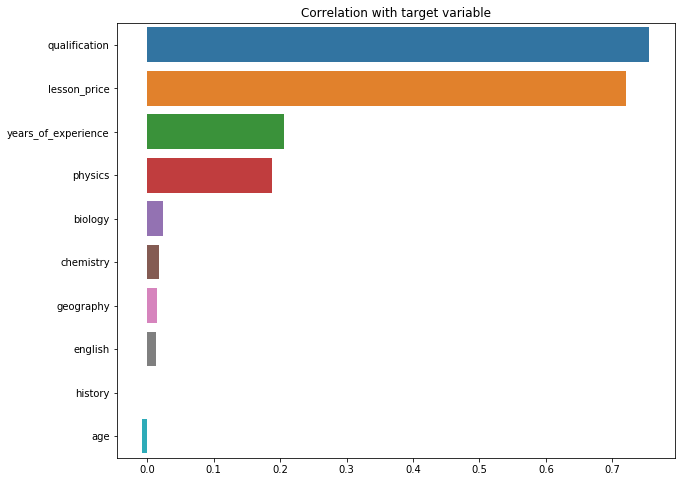

In [75]:
show_corr_bars(df, BASE_FEATURE_NAMES, TARGET)

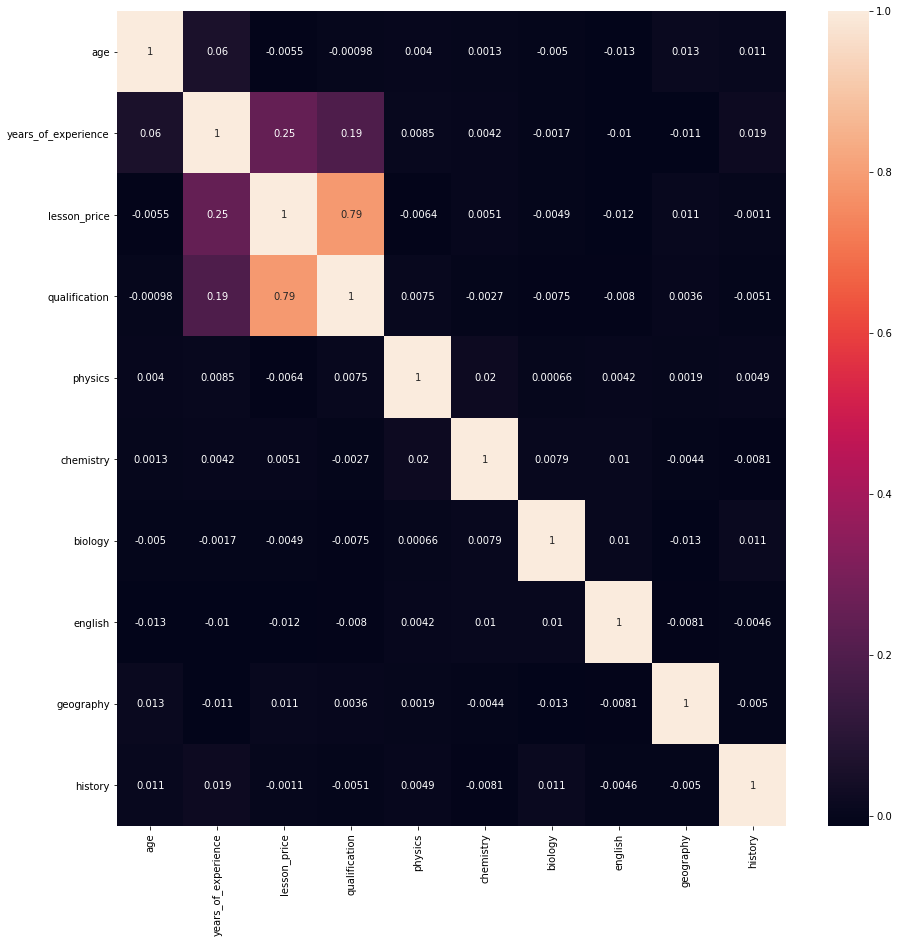

In [76]:
data = BASE_FEATURE_NAMES.copy()
data.append(TARGET)
fig, ax = plt.subplots(figsize=(15, 15))
corr = df[BASE_FEATURE_NAMES].corr()
sns.heatmap(corr, annot=True)

### Отбор признаков

In [77]:
# Создаем новый признак и собираем в него все предметы
# df = create_subject_col(df)
# df_test = create_subject_col(df_test)

In [78]:
BASE_FEATURE_NAMES.remove(HISTORY)

In [79]:
BASE_FEATURE_NAMES

['age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography']

### Модель

In [195]:
# class DecisionTree():
#     def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
#         self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
#         self.depth = depth
#         print(f_idxs)
# #         print(self.depth)
#         self.n_features = n_features
#         self.n, self.c = len(idxs), x.shape[1]
#         self.val = np.mean(y[idxs])
#         self.score = float('inf')
#         self.find_varsplit()
        
#     def find_varsplit(self):
#         for i in self.f_idxs: self.find_better_split(i)
#         if self.is_leaf: return
#         x = self.split_col
#         lhs = np.nonzero(x<=self.split)[0]
#         rhs = np.nonzero(x>self.split)[0]
#         lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
#         rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
#         self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
#         self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

#     def find_better_split(self, var_idx):
#         x, y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
#         sort_idx = np.argsort(x)
#         sort_y,sort_x = y[sort_idx], x[sort_idx]
#         rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
#         lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

#         for i in range(0,self.n-self.min_leaf-1):
#             xi,yi = sort_x[i],sort_y[i]
#             lhs_cnt += 1; rhs_cnt -= 1
#             lhs_sum += yi; rhs_sum -= yi
#             lhs_sum2 += yi**2; rhs_sum2 -= yi**2
#             if i<self.min_leaf or xi==sort_x[i+1]:
#                 continue

#             lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
#             rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
#             curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
#             if curr_score<self.score: 
#                 self.var_idx,self.score,self.split = var_idx,curr_score,xi

#     @property
#     def split_name(self): return self.x.columns[self.var_idx]
    
#     @property
#     def split_col(self): return self.x.values[self.idxs,self.var_idx]

#     @property
#     def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

#     def predict(self, x):
#         return np.array([self.predict_row(xi) for xi in x])

#     def predict_row(self, xi):
#         if self.is_leaf: return self.val
#         t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
#         return t.predict_row(xi)

In [88]:
# class DecisionTreeRegressor:
  
#   def fit(self, X, y, min_leaf = 5):
#     self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
#     return self

#   def predict(self, X):
#     return self.dtree.predict(X.values)

In [220]:
class Node:

    def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs
        self.f_idxs = f_idxs
        self.depth = depth
        self.n_features = n_features
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y.iloc[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = Node(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = Node(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y.iloc[self.idxs]
        lhs_std = y.iloc[lhs].std()
        rhs_std = y.iloc[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf' )or self.depth <= 0

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x.values])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

In [224]:
class RandomForest():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=5):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        print(self.n_features, "sha: ",x.shape[1])    
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return Node(self.x.iloc[idxs], self.y.iloc[idxs], self.n_features, f_idxs,
                     idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return np.sqrt((s2/cnt) - (s1/cnt)**2)

### Обучение модели  и проверка качества

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df[BASE_FEATURE_NAMES], df[TARGET], test_size=0.25)

In [225]:
%%time
model = RandomForest(X_train, y_train, n_trees=10, n_features="sqrt", sample_sz=7500)

3 sha:  9
Wall time: 37min 56s


In [142]:
# %%time
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

Wall time: 4min 13s


In [237]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'R2 на трейне - {r2_score(y_train_pred, y_train)}')
print(f'R2 на тесте - {r2_score(y_test_pred, y_test)}')

R2 на трейне - 0.7689999935083751
R2 на тесте - 0.7054192069533989


In [144]:
# Дерево решений
# # R2 на трейне - 0.8207165862122612
# # R2 на тесте - 0.6831271237832768

# R2 на трейне - 0.8180684550813299
# R2 на тесте - 0.6832810598393606

# min leaf = 15
# R2 на трейне - 0.8117678948971008
# R2 на тесте - 0.689222642795833

In [ ]:
# Случайный лес
# sample size = 1000
# R2 на трейне - 0.7169203093660891
# R2 на тесте - 0.7178647607515087

# sample size = 7500
# R2 на трейне - 0.8117678948971008
# R2 на тесте - 0.689222642795833

In [230]:
# BEST SCORE 
# n_trees=10, n_features="sqrt", sample_sz=7500, depth=10, min_leaf=5
# R2 на трейне - 0.7689999935083751
# R2 на тесте - 0.7054192069533989

### Финальное обучение на всем датасете, предсказание для теста

In [238]:
%%time
final_model = RandomForest(df[BASE_FEATURE_NAMES], df[TARGET], n_trees=10, n_features="sqrt", sample_sz=df.shape[0])

3 sha:  9
Wall time: 53min 45s


In [241]:
Y = final_model.predict(df_test[BASE_FEATURE_NAMES])
df_test[TARGET] = Y
df_test.loc[:, [ID, TARGET]].to_csv('Kolchedantsev_predictions.csv', index=False)

In [242]:
!kaggle competitions submit -c tutors-expected-math-exam-results -f Kolchedantsev_predictions.csv -m ""

Successfully submitted to Tutors - expected math exam results



  0%|          | 0.00/221k [00:00<?, ?B/s]
  4%|3         | 8.00k/221k [00:00<00:18, 11.8kB/s]
100%|##########| 221k/221k [00:05<00:00, 42.0kB/s] 
